In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import   r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV , train_test_split

In [2]:
data = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')


In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
cat_cols = ['gender',
            'race/ethnicity',
            'parental level of education',
            'lunch'
            ]
num_cols = [
            'math score',
            'reading score',
            'writing score'
]
data['Total Score'] = data['writing score'] + data['math score'] + data['reading score']
data['Mean Score'] = ((data['writing score'] + data['math score'] + data['reading score']) // 3)

In [5]:
print(data.shape)

(1000, 10)


In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Mean Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


## The average of the final result and for each of the subjects

In [7]:
print('Total' ,np.mean(data['Total Score'] / 3))
print('Reading' , np.mean(data['reading score']))
print('Math' , np.mean(data['math score']))
print('Writing' ,np.mean(data['writing score']))

Total 67.77066666666666
Reading 69.169
Math 66.089
Writing 68.054


## Displaying data for numerical features

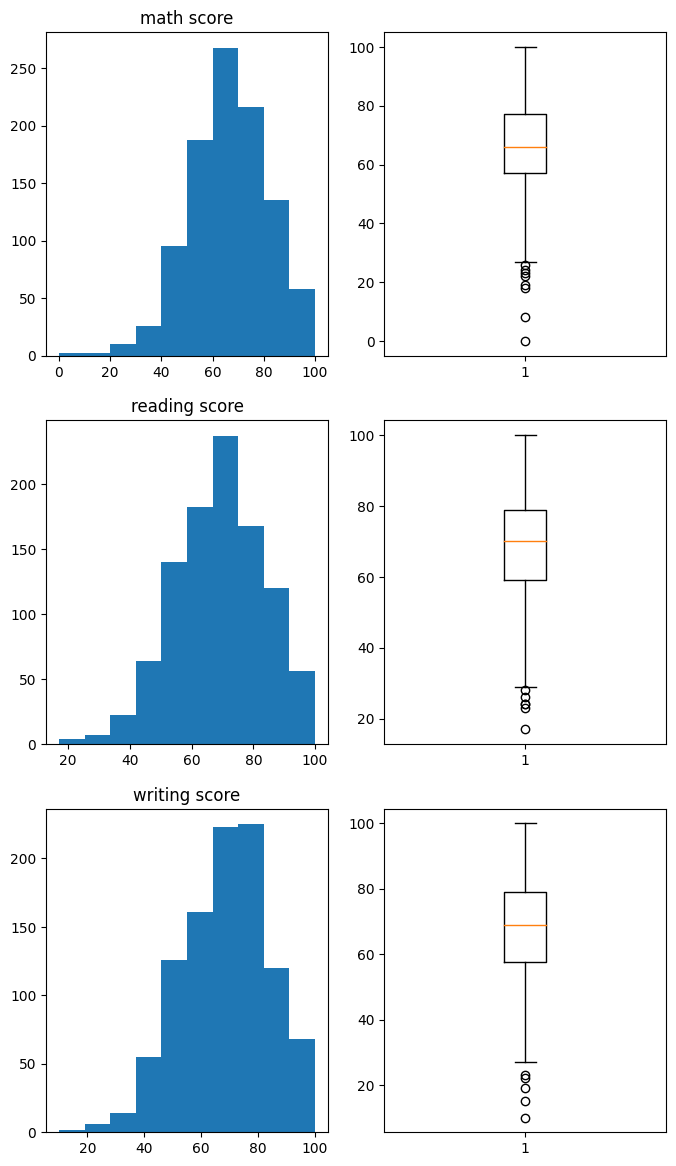

In [8]:
plt.figure(figsize=(8, 30), dpi=100)
n = len(num_cols)
for i, col in enumerate(num_cols):
    plt.subplot(2*n, 2, 2*i+1)
    plt.hist(data[col], bins=10)
    plt.title(col)
    plt.subplot(2*n, 2, 2*i+2)
    plt.boxplot(data[col].values)

## Displaying data for categorical features

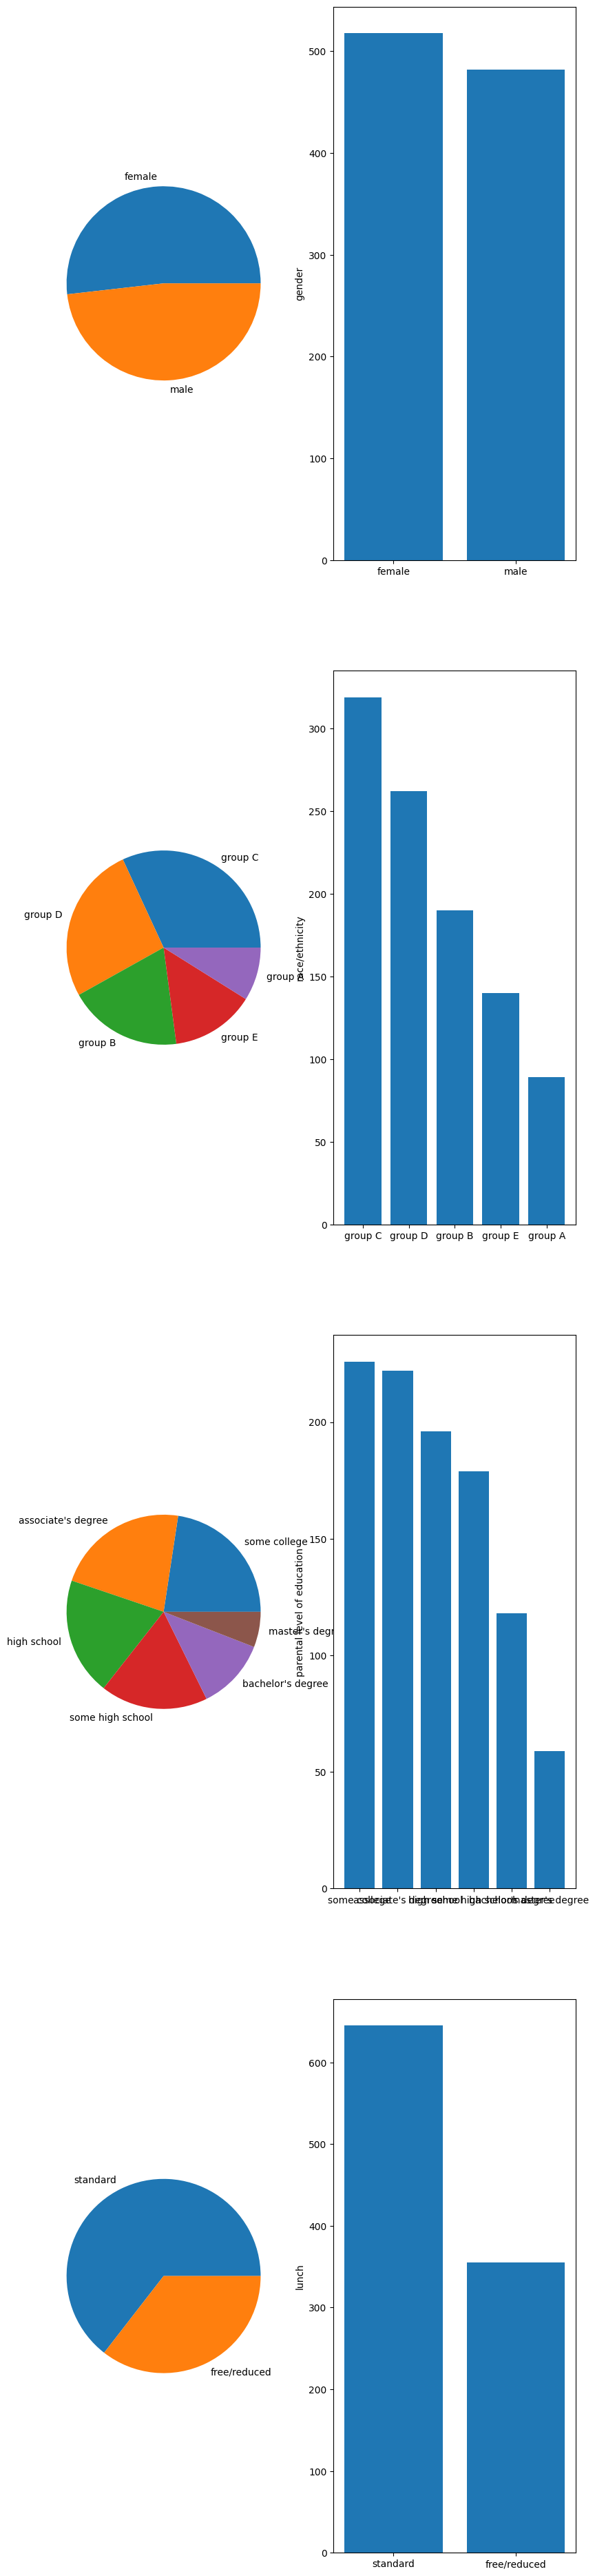

In [9]:
plt.figure(figsize=(10, 100), dpi=100)
n = len(cat_cols)
for i, col in enumerate(cat_cols):
    value_counts = data[col].value_counts()
    plt.subplot(2*n,2,2*i+1)
    plt.pie(value_counts, labels=value_counts.index)
    plt.subplot(2*n,2,2*i+2)
    plt.bar(np.arange(len(value_counts)), value_counts, tick_label=value_counts.index)
    plt.ylabel(col)

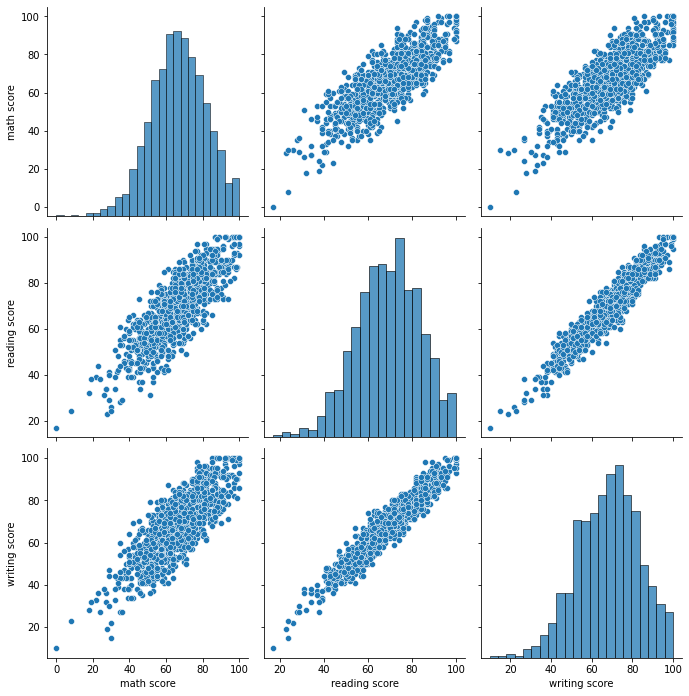

In [10]:
f = sns.pairplot(data[num_cols]);
f.fig.set_size_inches(10,10)

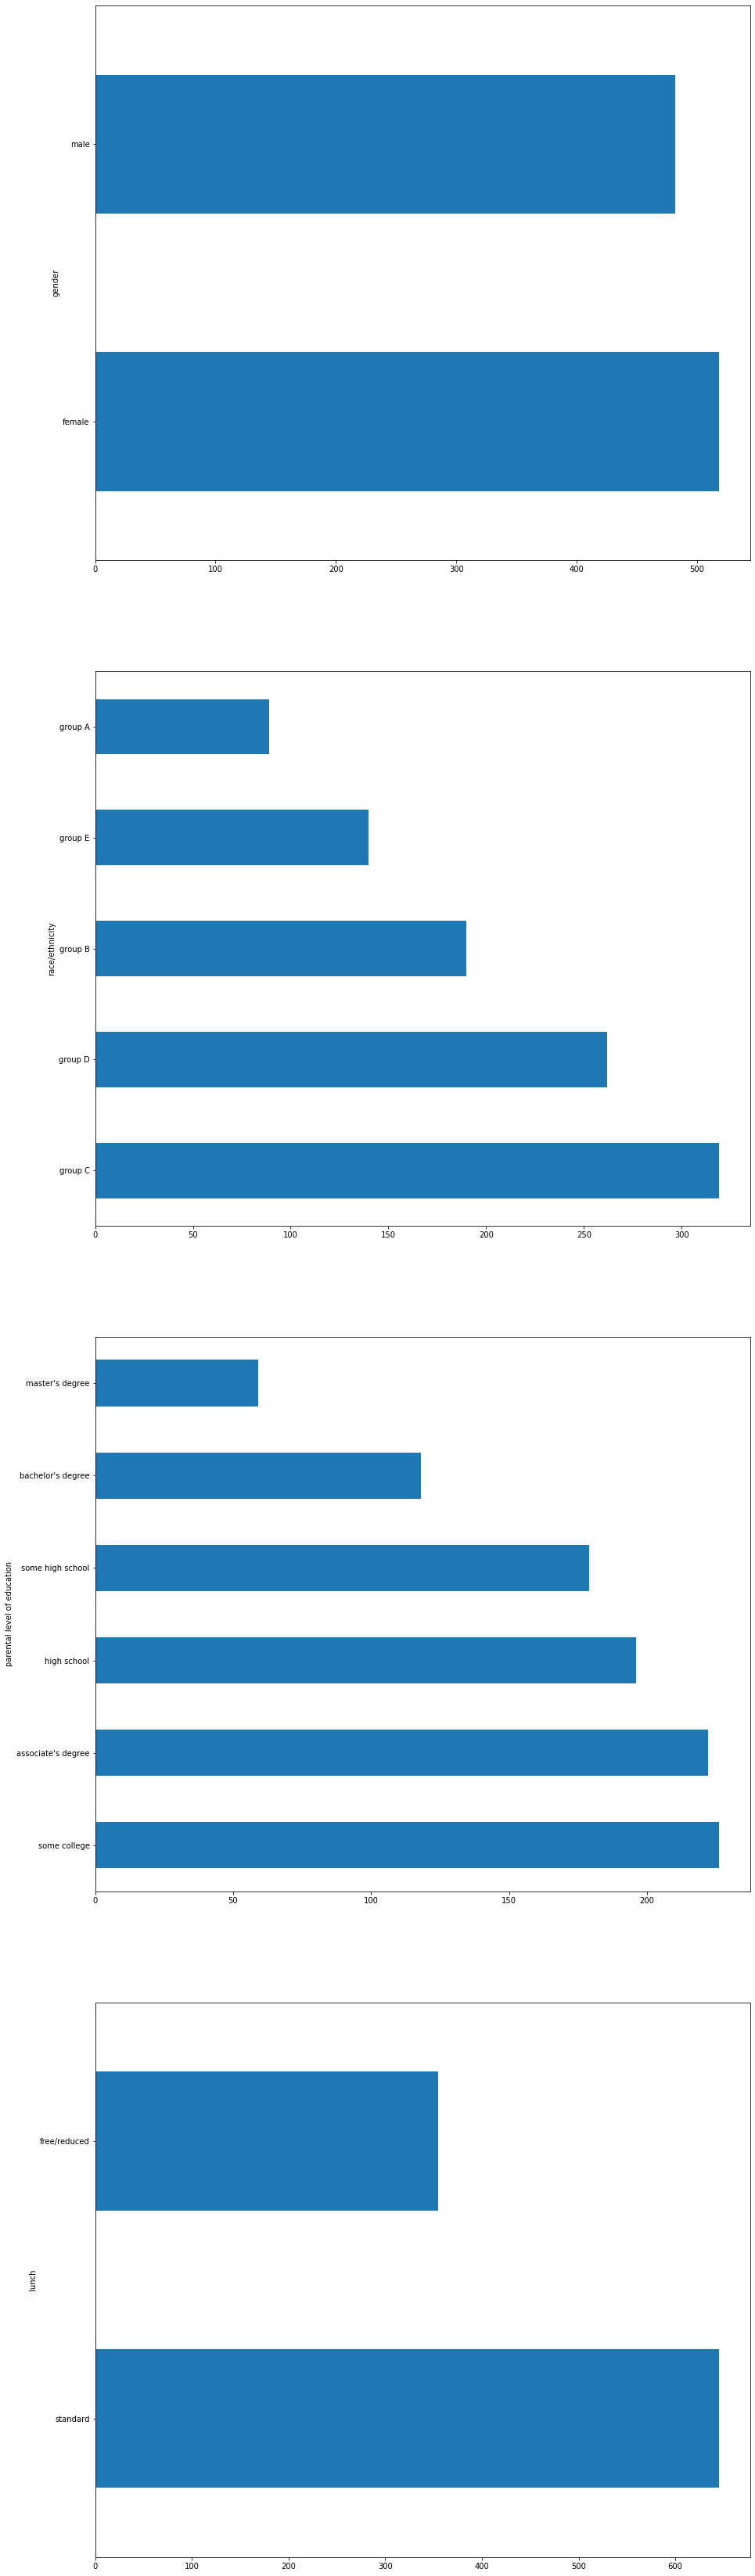

In [11]:
n = len(cat_cols)
for i, col in enumerate(cat_cols):
    value_counts = data[col].value_counts()
    plt.subplot(n,1,i+1)
    value_counts.plot(kind="barh", figsize=(15, 60))
    plt.ylabel(col)

## Processing of categorical features

In [12]:
le = LabelEncoder()
for col in cat_cols:
  data[col] = le.fit_transform(data[col])
  data[col]  = data[col].astype('int')
data['test preparation course'] = le.fit_transform(data['test preparation course'])

In [13]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Mean Score
0,0,1,1,1,1,72,72,74,218,72
1,0,2,4,1,0,69,90,88,247,82
2,0,1,3,1,1,90,95,93,278,92
3,1,0,0,0,1,47,57,44,148,49
4,1,2,4,1,1,76,78,75,229,76


In [14]:
X = data.drop(['gender'], axis= 1)
y = data['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2)

## LogisticRegression and GridSearchCV


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression();
model.fit(X_train,y_train);
pred_model = model.predict(X_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
print("Logistic Regression  Score : ",model.score(X_test,y_test))

Logistic Regression  Score :  0.91


In [17]:
params = {'C' : [0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100]}

In [18]:
model_cv = GridSearchCV(model , param_grid= params , cv = 5 , n_jobs= -1)
model_cv.fit(X_train , y_train)
pred_model_cv = model_cv.predict(X_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
print("Logistic Regression(GridSearchCV) : ",model_cv.score(X_test,y_test))

Logistic Regression(GridSearchCV) :  0.905


## RandomForestClassifier and GridSearchCV

In [20]:
from sklearn.ensemble import RandomForestClassifier
random_tree = RandomForestClassifier()
random_tree.fit(X_train,y_train);
pred_model = random_tree.predict(X_train)

In [21]:
print("RandomForestClassifier  Score : ",random_tree.score(X_test,y_test))

RandomForestClassifier  Score :  0.84


In [22]:
params_tree = {'max_depth' : [4, 5 , 6 , 7 , 8 , 9 , 10 , 11],
          'n_estimators' : [100,500]}

In [23]:
random_tree_cv = GridSearchCV(random_tree , param_grid= params_tree , cv = 5 , n_jobs= -1)
random_tree_cv.fit(X_train,y_train);
pred_model = random_tree_cv.predict(X_train)

In [24]:
print("RandomForestClassifier(GridSearchCV)  Score : ",random_tree_cv.score(X_test,y_test))

RandomForestClassifier(GridSearchCV)  Score :  0.845


## KNeighborsClassifier and GridSearchCV

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [26]:
print("KNeighborsClassifier  Score : ",knn.score(X_test,y_test))

KNeighborsClassifier  Score :  0.825


In [27]:
params_knn = {'n_neighbors' : [4, 5 , 6 , 7 , 8 , 9 , 10 , 11],
          'weights' : ['distance']}

In [28]:
knn_cv = GridSearchCV(knn , param_grid= params_knn , cv = 5 , n_jobs= -1)
knn_cv.fit(X_train,y_train)
knn_cv_pred = knn_cv.predict(X_test)

In [29]:
print("KNeighborsClassifier(GridSearchCV)  Score : ",knn_cv.score(X_test,y_test))

KNeighborsClassifier(GridSearchCV)  Score :  0.845
